In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

load the data and know how many classes are there (target column)

In [2]:
iris = load_iris()
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
print(dataset['target'].unique())
dataset.head()

[0. 1. 2.]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


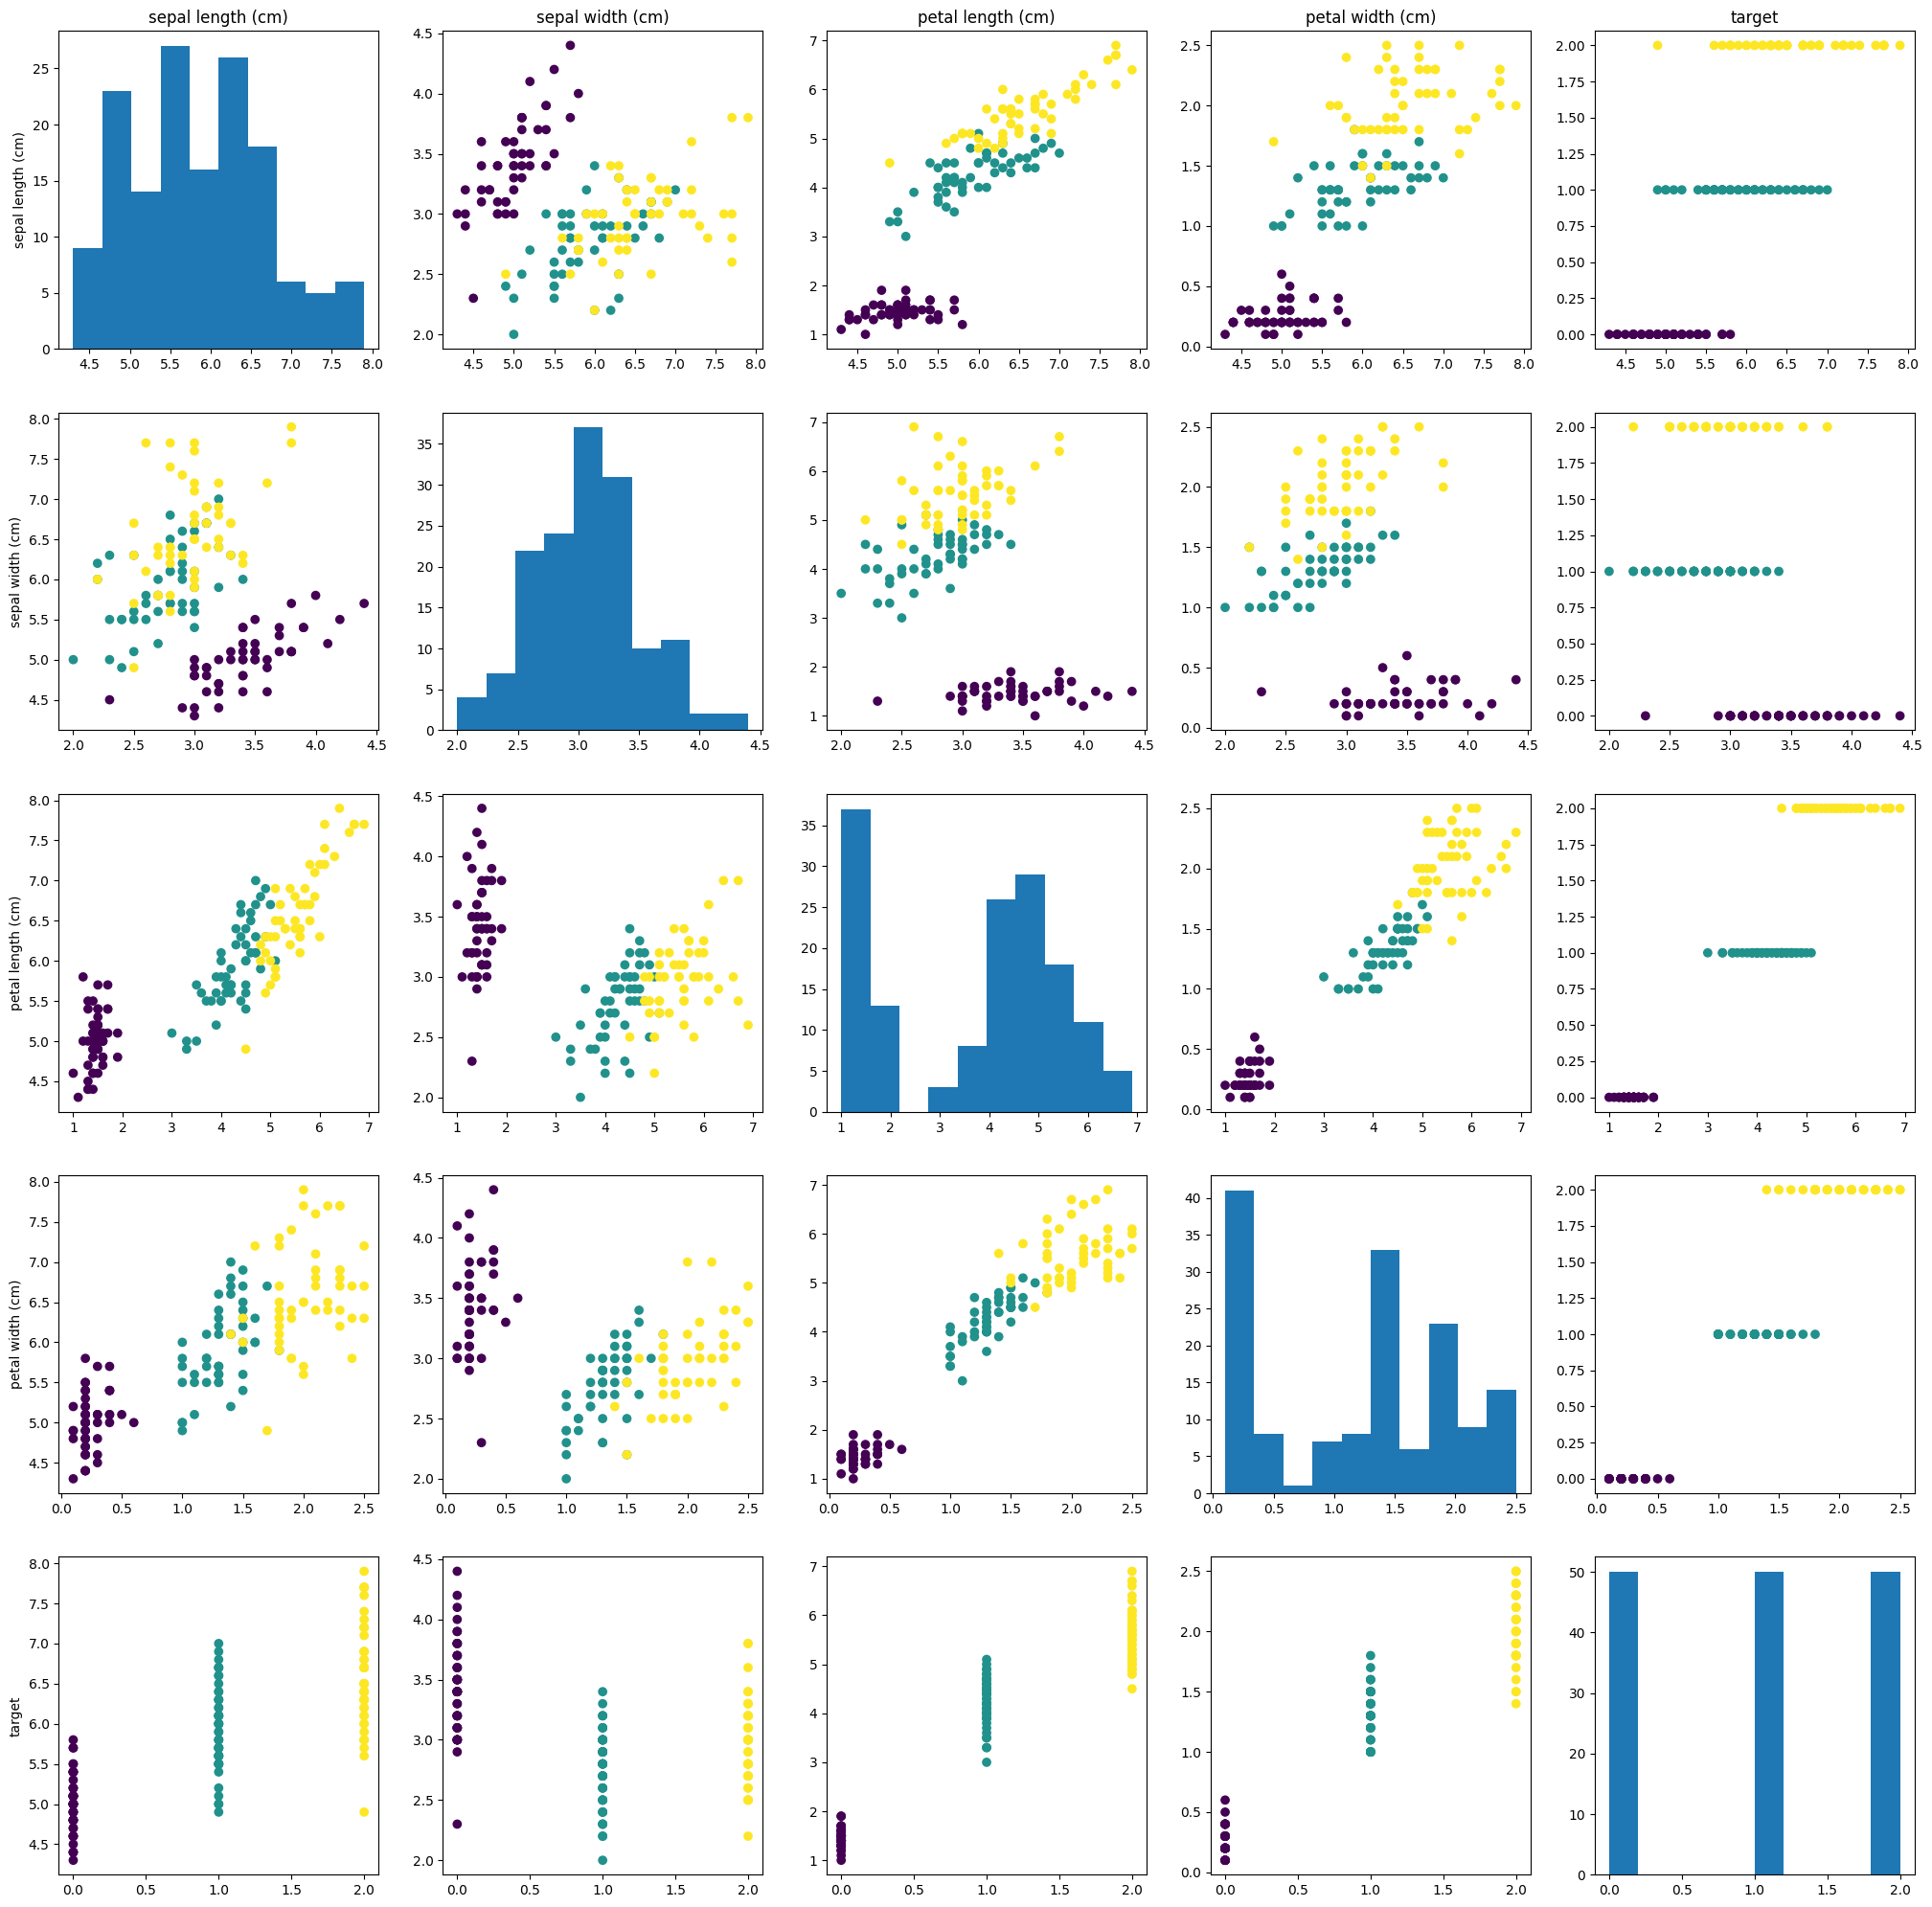

In [3]:
fig, axs = plt.subplots(len(dataset.columns), len(dataset.columns), figsize=(25, 25))

for i in range(len(dataset.columns)):
  for j in range(len(dataset.columns)):
    if i == j:
      axs[i,j].hist(dataset[dataset.columns[i]])
    else:
      axs[i,j].scatter(dataset[dataset.columns[i]], dataset[dataset.columns[j]], c=dataset.target)
    axs[0,j].set_title(dataset.columns[j])
  axs[i,0].set(ylabel=dataset.columns[i])

plt.show()

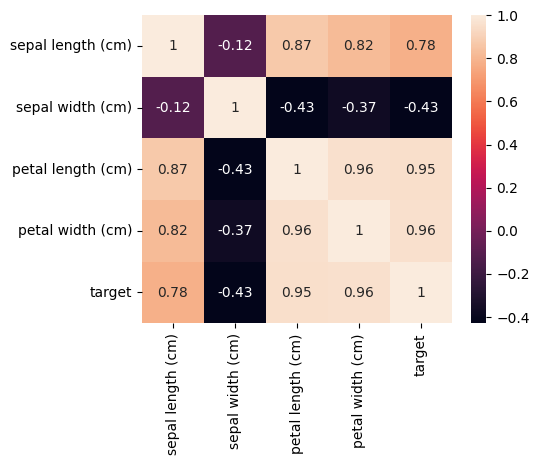

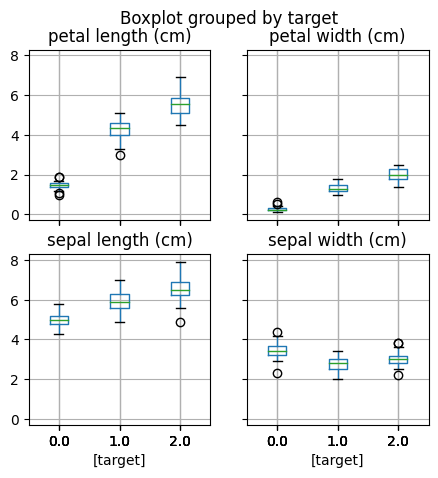

In [4]:
correlation_matrix = dataset.corr().round(2)
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax) # annot = True to print the values inside the square
plt.show()
dataset.boxplot(by="target", figsize=(5,5))
plt.show()

In [5]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, [0,1,2, 3]].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
### Print results
probs_y = np.round(probs_y, 2)


In [8]:
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2.0        | 2.0        | 0.0        | 0.03          | 0.97      
1.0        | 1.0        | 0.01       | 0.95          | 0.04      
0.0        | 0.0        | 1.0        | 0.0           | 0.0       
2.0        | 2.0        | 0.0        | 0.08          | 0.92      
0.0        | 0.0        | 0.98       | 0.02          | 0.0       
2.0        | 2.0        | 0.0        | 0.01          | 0.99      
0.0        | 0.0        | 0.98       | 0.02          | 0.0       
1.0        | 1.0        | 0.01       | 0.71          | 0.28      
1.0        | 1.0        | 0.0        | 0.73          | 0.27      
1.0        | 1.0        | 0.02       | 0.89          | 0.08      
2.0        | 2.0        | 0.0        | 0.44          | 0.56      
1.0        | 1.0        | 0.02       | 0.76          | 0.22      
1.0        | 1.0        | 0.01       | 0.85          | 0.13      
1.0     

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


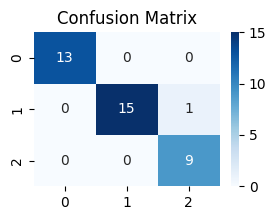

<Figure size 500x500 with 0 Axes>

In [12]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
# confusion matrix sns heatmap
fig, ax = plt.subplots(figsize=(3,2))
# ax = plt.axes()
df_cm = cm


sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.figure(figsize = (5,5))
plt.show()